# Pytorch
## Images as PyTorch Tensors


In [1]:
import torch

# Create a 3-dimensional tensor
images = torch.rand((4, 28, 28))

# Get the second image
second_image = images[1]


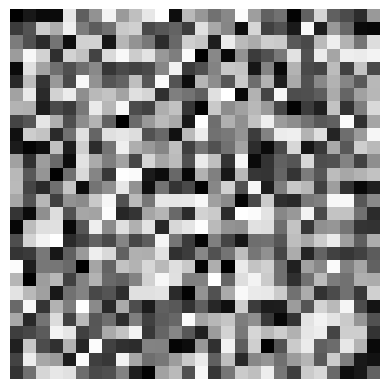

In [2]:
# Displaying Images
import matplotlib.pyplot as plt

plt.imshow(second_image, cmap='gray')
plt.axis('off') # disable axes
plt.show()

In [4]:
# Matrix Multiplication
a = torch.tensor([[1, 1], [1, 0]])

print(a)
# tensor([[1, 1],
#         [1, 0]])

print(torch.matrix_power(a, 2))
# tensor([[2, 1],
#         [1, 1]])

print(torch.matrix_power(a, 3))
# tensor([[3, 2],
#         [2, 1]])

print(torch.matrix_power(a, 4))
# tensor([[5, 3],
#         [3, 2]])

tensor([[1, 1],
        [1, 0]])
tensor([[2, 1],
        [1, 1]])
tensor([[3, 2],
        [2, 1]])
tensor([[5, 3],
        [3, 2]])


## PyTorch Neural Networks

In [5]:
import torch
import torch.nn as nn

class MLP(nn.Module):
        def __init__(self, input_size):
            super(MLP, self).__init__()
            self.hidden_layer = nn.Linear(input_size, 64)
            self.output_layer = nn.Linear(64, 2)
            self.activation = nn.ReLU()

        def forward(self, x):
            x = self.activation(self.hidden_layer(x))
            return self.output_layer(x)

model = MLP(input_size=10)
print(model)
# MLP(
#   (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
#   (output_layer): Linear(in_features=64, out_features=2, bias=True)
#   (activation): ReLU()
# )

model.forward(torch.rand(10))
# tensor([0.2294, 0.2650], grad_fn=<AddBackward0>)

MLP(
  (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=2, bias=True)
  (activation): ReLU()
)


tensor([0.0615, 0.0274], grad_fn=<ViewBackward0>)

## Loss Functions
### Cross-Entropy Loss

In [6]:
import torch
import torch.nn as nn

loss_function = nn.CrossEntropyLoss()

# Our dataset contains a single image of a dog, where
# cat = 0 and dog = 1 (corresponding to index 0 and 1)
target_tensor = torch.tensor([1])
target_tensor
# tensor([1])
# Prediction: Most likely a dog (index 1 is higher)



tensor([1])

In [7]:

# Note that the values do not need to sum to 1
predicted_tensor = torch.tensor([[2.0, 6.0]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value
# tensor(0.0181)

# Prediction: Slightly more likely a cat (index 0 is higher)

tensor(0.0181)

In [8]:




predicted_tensor = torch.tensor([[1.5, 1.1]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value
# tensor(0.9130)


tensor(0.9130)

### Mean Squared Error Loss

In [9]:
# Define the loss function
loss_function = nn.MSELoss()

# Define the predicted and actual values as tensors
predicted_tensor = torch.tensor([320000.0])
actual_tensor = torch.tensor([300000.0])

# Compute the MSE loss
loss_value = loss_function(predicted_tensor, actual_tensor)
print(loss_value.item()) # Loss value: 20000 * 20000 / 1 = ...
# 400000000.0

400000000.0


## PyTorch Optimizers



In [10]:
import torch.optim as optim


### Stochastic Gradient Descent: common optimizer

In [11]:
# momentum=0.9 smoothes out updates and can help training
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


### Adam: good go-to optimizer

In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

## PyTorch Datasets and Data Loaders

### Dataset: how data is accessed and transformed

In [13]:
from torch.utils.data import Dataset

# Create a toy dataset
class NumberProductDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = self.numbers[index]
        number2 = self.numbers[index] + 1
        return (number1, number2), number1 * number2

    def __len__(self):
        return len(self.numbers)

# Instantiate the dataset
dataset = NumberProductDataset(
    data_range=(0, 11)
)

# Access a data sample
data_sample = dataset[3]
print(data_sample)
# ((3, 4), 12)

((3, 4), 12)


In [14]:
dataset[0]

((0, 1), 0)

### Data Loaders: batch shuffle,parallelized loading

In [15]:
from torch.utils.data import DataLoader

# Instantiate the dataset
dataset = NumberProductDataset(data_range=(0, 5))

# Create a DataLoader instance
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

# Iterating over batches
for (num_pairs, products) in dataloader:
    print(num_pairs, products)
# [tensor([4, 3, 1]), tensor([5, 4, 2])] tensor([20, 12, 2])
# [tensor([2, 0]), tensor([3, 1])] tensor([6, 0])

[tensor([3, 0, 4]), tensor([4, 1, 5])] tensor([12,  0, 20])
[tensor([2, 1]), tensor([3, 2])] tensor([6, 2])


## Training Loop

In [16]:
# Create a Number Sum Dataset
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class NumberSumDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = float(self.numbers[index // len(self.numbers)])
        number2 = float(self.numbers[index % len(self.numbers)])
        return torch.tensor([number1, number2]), torch.tensor([number1 + number2])

    def __len__(self):
        return len(self.numbers) ** 2

In [17]:
#Inspect the Dataset
dataset = NumberSumDataset(data_range=(1, 100))

for i in range(5):
    print(dataset[i])
# (tensor([1., 1.]), tensor([2.]))
# (tensor([1., 2.]), tensor([3.]))
# (tensor([1., 3.]), tensor([4.]))
# (tensor([1., 4.]), tensor([5.]))
# (tensor([1., 5.]), tensor([6.]))

(tensor([1., 1.]), tensor([2.]))
(tensor([1., 2.]), tensor([3.]))
(tensor([1., 3.]), tensor([4.]))
(tensor([1., 4.]), tensor([5.]))
(tensor([1., 5.]), tensor([6.]))


In [18]:
# Define a Simple Model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 128)
        self.output_layer = nn.Linear(128, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)
# Instantiate Components Needed for Training
dataset = NumberSumDataset(data_range=(0, 100))
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)
model = MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [19]:
# Create a Training Loop
for epoch in range(10):
    total_loss = 0.0
    for number_pairs, sums in dataloader:  # Iterate over the batches
        predictions = model(number_pairs)  # Compute the model output
        loss = loss_function(predictions, sums)  # Compute the loss
        loss.backward()  # Perform backpropagation
        optimizer.step()  # Update the parameters
        optimizer.zero_grad()  # Zero the gradients

        total_loss += loss.item()  # Add the loss for all batches

    # Print the loss for this epoch
    print("Epoch {}: Sum of Batch Losses = {:.5f}".format(epoch, total_loss))
    # Epoch 0: Sum of Batch Losses = 118.82360
    # Epoch 1: Sum of Batch Losses = 39.75702
    # Epoch 2: Sum of Batch Losses = 2.16352
    # Epoch 3: Sum of Batch Losses = 0.25178
    # Epoch 4: Sum of Batch Losses = 0.22843
    # Epoch 5: Sum of Batch Losses = 0.19182
    # Epoch 6: Sum of Batch Losses = 0.15507
    # Epoch 7: Sum of Batch Losses = 0.07789
    # Epoch 8: Sum of Batch Losses = 0.06329
    # Epoch 9: Sum of Batch Losses = 0.04936

Epoch 0: Sum of Batch Losses = 371772.88756
Epoch 1: Sum of Batch Losses = 4241.01935
Epoch 2: Sum of Batch Losses = 1018.00665
Epoch 3: Sum of Batch Losses = 78.91013
Epoch 4: Sum of Batch Losses = 19.11314
Epoch 5: Sum of Batch Losses = 12.04814
Epoch 6: Sum of Batch Losses = 8.56439
Epoch 7: Sum of Batch Losses = 6.41035
Epoch 8: Sum of Batch Losses = 5.02365
Epoch 9: Sum of Batch Losses = 4.05317


In [20]:

# Try the Model Out
# Test the model on 3 + 7
model(torch.tensor([3.0, 7.0]))
# tensor([10.1067], grad_fn=<AddBackward0>)

tensor([10.2435], grad_fn=<ViewBackward0>)

# Hugging Face 

## Download hf model in China
1. download hf_download.py from https://github.com/LetheSec/HuggingFace-Download-Accelerator to help download data and model
2. use the cmd to download model to offline `python hf_download.py --model google-bert/bert-base-uncased --save_dir /Users/yilin/Documents/Projects/huggingface`



## Tokenizers

In [7]:
from transformers import BertTokenizer

model_name = 'models--google-bert--bert-base-uncased'
cache_dir='/Users/yilin/Documents/Projects/huggingface'
# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained(cache_dir+'/'+model_name)

# See how many tokens are in the vocabulary
tokenizer.vocab_size
# 30522

30522

In [8]:
# Tokenize the sentence
tokens = tokenizer.tokenize("I heart Generative AI")

# Print the tokens
print(tokens)
# ['i', 'heart', 'genera', '##tive', 'ai']

# Show the token ids assigned to each token
print(tokenizer.convert_tokens_to_ids(tokens))
# [1045, 2540, 11416, 6024, 9932]

['i', 'heart', 'genera', '##tive', 'ai']
[1045, 2540, 11416, 6024, 9932]


In [13]:
cache_dir+'/'+model_name

'/Users/yilin/Documents/Projects/huggingface/models--textattack--bert-base-uncased-imdb'

## Model

In [15]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load a pre-trained sentiment analysis model
# model_name = "textattack/bert-base-uncased-imdb"
model_name='/Users/yilin/Documents/Projects/huggingface/models--textattack--bert-base-uncased-imdb'
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the input sequence
tokenizer = BertTokenizer.from_pretrained(model_name)
inputs = tokenizer("I love Generative AI", return_tensors="pt")

# Make prediction
with torch.no_grad():
    outputs = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    predicted_class = torch.argmax(probabilities)

# Display sentiment result
if predicted_class == 1:
    print(f"Sentiment: Positive ({probabilities[0][1] * 100:.2f}%)")
else:
    print(f"Sentiment: Negative ({probabilities[0][0] * 100:.2f}%)")
# Sentiment: Positive (88.68%)

Sentiment: Positive (88.68%)


## Dataset

In [18]:
from datasets import load_dataset
from IPython.display import HTML, display

# Load the IMDB dataset, which contains movie reviews
# and sentiment labels (positive or negative)
# dataset_name = "imdb"
dataset_name =cache_dir+'/'+ 'datasets--stanfordnlp--imdb'
dataset = load_dataset(dataset_name)

# Fetch a review from the training set
review_number = 42
sample_review = dataset["train"][review_number]

display(HTML(sample_review["text"][:450] + "..."))
# WARNING: This review contains SPOILERS. Do not read if you don't want some points revealed to you before you watch the
# film.
# 
# With a cast like this, you wonder whether or not the actors and actresses knew exactly what they were getting into. Did they
# see the script and say, `Hey, Close Encounters of the Third Kind was such a hit that this one can't fail.' Unfortunately, it does.
# Did they even think to check on the director's credentials...

if sample_review["label"] == 1:
    print("Sentiment: Positive")
else:
    print("Sentiment: Negative")
# Sentiment: Negative

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Sentiment: Negative


## Trainer

In [21]:
from transformers import (DistilBertForSequenceClassification,
    DistilBertTokenizer,
    TrainingArguments,
    Trainer
)
from datasets import load_dataset
# model_name = 'distilbert-base-uncased'
model_name = cache_dir+'/'+ 'models--distilbert--distilbert-base-uncased'
model = DistilBertForSequenceClassification.from_pretrained(
    model_name, num_labels=2
)
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


dataset = load_dataset(dataset_name)
tokenized_datasets = dataset.map(tokenize_function, batched=True)

training_args = TrainingArguments(
    per_device_train_batch_size=64,
    output_dir="./results",
    learning_rate=2e-5,
    num_train_epochs=3,
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
)
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at /Users/yilin/Documents/Projects/huggingface/models--distilbert--distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

RuntimeError: MPS backend out of memory (MPS allocated: 16.77 GB, other allocations: 1.03 GB, max allowed: 18.13 GB). Tried to allocate 384.00 MB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).